## Random Forest Practice
- using salaries dataset
- baseline decision tree model
- bagged classifier
- random forest 

In [2]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

### salaries
- get_dummies for categorical features

In [6]:
salaries = pd.read_csv('data/input/employee_data.csv', index_col = 0).drop(['id'], axis=1)
salaries.head()

,groups,age,healthy_eating,active_lifestyle,salary
0,A,36,5,5,2297
1,A,55,3,5,1134
2,A,61,8,1,4969
3,O,29,3,6,902
4,O,34,6,2,3574


In [20]:
salaries['target'] = np.where(salaries['salary'] >= salaries['salary'].median(), 1, 0)

In [21]:
salaries.head()

,groups,age,healthy_eating,active_lifestyle,salary,target
0,A,36,5,5,2297,1
1,A,55,3,5,1134,0
2,A,61,8,1,4969,1
3,O,29,3,6,902,0
4,O,34,6,2,3574,1


In [23]:
target = salaries['target']
salaries.drop(['target', 'salary'], axis=1, inplace=True)

In [41]:
salaries['groups'] = salaries['groups'].astype('str')
salaries['age']=salaries['age'].astype('int') # get dummies treat strig as categorical, so make sure aga is not string
salaries['healthy_eating']=salaries['healthy_eating'].astype('str')
salaries['active_lifestyle'] = salaries['active_lifestyle'].astype('str')

In [43]:
data = pd.get_dummies(salaries)

In [44]:
data.head()

,age,groups_A,groups_AB,groups_B,groups_O,healthy_eating_0,healthy_eating_1,healthy_eating_10,healthy_eating_2,healthy_eating_3,...,active_lifestyle_1,active_lifestyle_10,active_lifestyle_2,active_lifestyle_3,active_lifestyle_4,active_lifestyle_5,active_lifestyle_6,active_lifestyle_7,active_lifestyle_8,active_lifestyle_9
0,36,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,55,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,61,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,29,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,34,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [49]:
data_train, data_test, target_train, target_test = train_test_split(data, target, 
                            test_size = 0.25, random_state=123)

### baseline decision tree model

In [50]:
# build a regular tree as base model for comparison
tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 5) 
tree_clf.fit(data_train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
tree_clf.feature_importances_ # not particulary useful

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.09720819, 0.        , 0.1922707 , 0.20304775,
       0.151701  , 0.14307593, 0.        , 0.        , 0.        ,
       0.        , 0.0069603 , 0.05115858, 0.        , 0.03907257,
       0.05283302, 0.        , 0.06267195, 0.        , 0.        ,
       0.        , 0.        ])

In [53]:
data_train.shape

(750, 27)

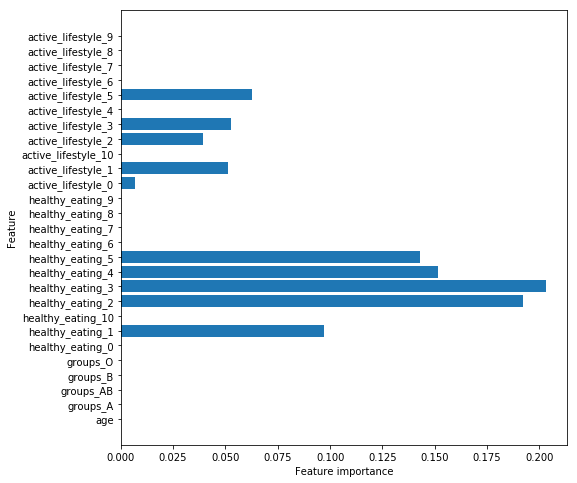

In [55]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(tree_clf)

In [56]:
# model performance
pred = tree_clf.predict(data_test)
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

[[118   2]
 [ 15 115]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       120
           1       0.98      0.88      0.93       130

   micro avg       0.93      0.93      0.93       250
   macro avg       0.94      0.93      0.93       250
weighted avg       0.94      0.93      0.93       250



In [57]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(target_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 93.2%


### bagged trees

In [59]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)

In [60]:
bagged_tree.fit(data_train, target_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [61]:
bagged_tree.score(data_train, target_train)

0.9226666666666666

In [ ]:
bagged_tree.score(data_train, target_train)

In [62]:
bagged_tree.score(data_test, target_test)

0.932

### random forest

In [63]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(data_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [64]:
forest.score(data_train, target_train)

0.9426666666666667

In [65]:
forest.score(data_test, target_test)

0.968

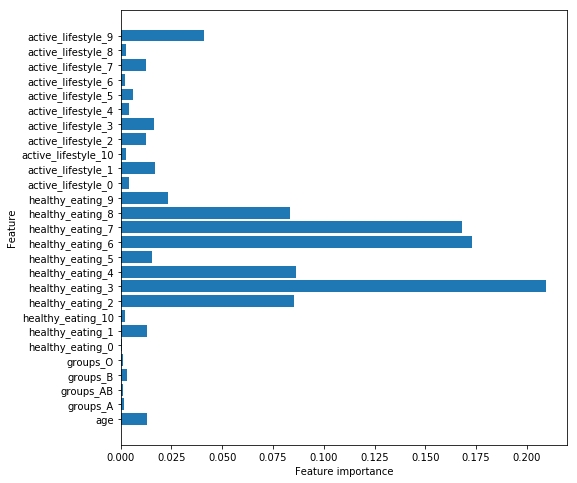

In [66]:
plot_feature_importances(forest)

In [67]:
# check trees in the forest
forest_2 = RandomForestClassifier(n_estimators = 5, max_features= 10, max_depth= 2)
forest_2.fit(data_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
rf_tree_1 = forest_2.estimators_[0]

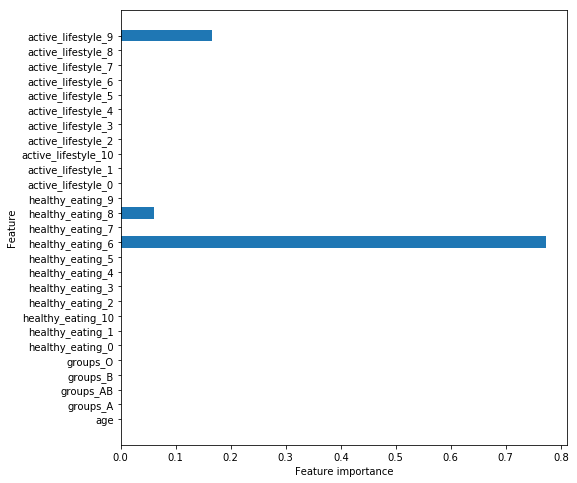

In [69]:
plot_feature_importances(rf_tree_1)

In [70]:
rf_tree_2 = forest_2.estimators_[1]

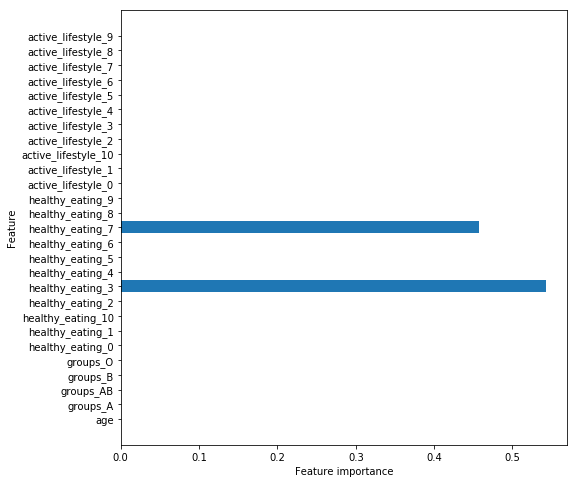

In [71]:
plot_feature_importances(rf_tree_2)

In [ ]:
# Random Forest look at different attributes, and have wildly different importances for them!